In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind

In [2]:
data = pd.read_csv("loan_data_set.csv")
data.shape

(614, 13)

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
target = "Loan_Status"
data[target].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [5]:
data[target].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [6]:
data.dtypes[data.dtypes == "object"]

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [7]:
data.dtypes[data.dtypes != "object"]

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

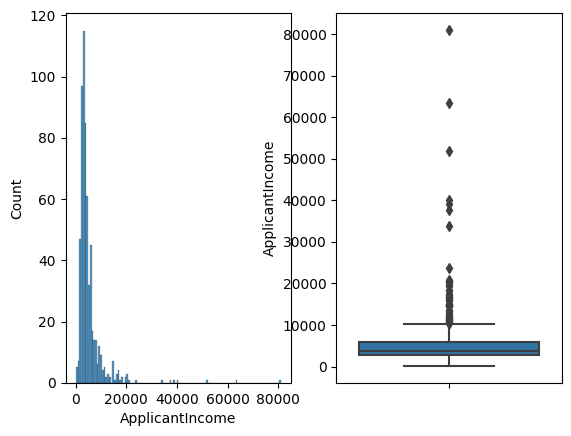

In [8]:
# Income of the applicant
plt.subplot(121)
sns.histplot(data["ApplicantIncome"])

plt.subplot(122)
sns.boxplot(y=data["ApplicantIncome"])

plt.show()

In [9]:
data[["ApplicantIncome", "Loan_Status"]]

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


In [10]:
data.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [11]:
data[data[target]=="Y"]["ApplicantIncome"]

0      5849
2      3000
3      2583
4      6000
5      5417
       ... 
608    3232
609    2900
610    4106
611    8072
612    7583
Name: ApplicantIncome, Length: 422, dtype: int64

In [12]:
# Assignment 1
## Unmarried-Single Man Vs Women
m2u = data.loc[(data["Married"]=="No")&(data["Gender"]=="Male")]["ApplicantIncome"]
w = data.loc[data["Gender"]=="Female"]["ApplicantIncome"]
ttest_ind(m2u, w, alternative="two-sided")

Ttest_indResult(statistic=1.1403012035198827, pvalue=0.25529750307622384)

In [13]:
# Assignment 2
## Unmarried-Graduated Man Vs Graduated Women
m2ug = data.loc[(data["Gender"]=="Male")&(data["Married"]=="No")&(data["Education"]=="Graduate")]["ApplicantIncome"]
w2g = data.loc[(data["Gender"]=="Female")&(data["Education"]=="Graduate")]["ApplicantIncome"]
ttest_ind(m2ug, w2g, alternative="two-sided")

Ttest_indResult(statistic=1.75360894634636, pvalue=0.0811185605889597)

In [14]:
# Assignment 3
## Unarried-Graduated Man Vs Graduated Women - Get Loan
from scipy.stats import chi2_contingency # when expected value has to be computed

m2ug = data.loc[(data["Gender"]=="Male")&(data["Married"]=="No")&(data["Education"]=="Graduate")]["Loan_Status"].value_counts()
w2g = data.loc[(data["Gender"]=="Female")&(data["Education"]=="Graduate")]["Loan_Status"].value_counts()
m2ug, w2g

(Loan_Status
 Y    62
 N    37
 Name: count, dtype: int64,
 Loan_Status
 Y    61
 N    31
 Name: count, dtype: int64)

In [15]:
observed = [[62, 37], [61, 31]]
chi_stat, p_value, df, exp_value= chi2_contingency(observed)
chi_stat, p_value, df, exp_value

(0.14381605008456969,
 0.7045164323229686,
 1,
 array([[63.7539267, 35.2460733],
        [59.2460733, 32.7539267]]))

In [16]:
# Assignment 4
data.dropna(inplace=True)
data["NewFeature"] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])
data["NewFeature"].mean()

11777.604166666666

In [17]:
data["Separator"] = data["NewFeature"].apply(lambda x: x>(0.25*data["NewFeature"].mean()))
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NewFeature,Separator
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,11967.0,True
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,10198.0,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,9943.0,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,13423.0,True
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,13218.0,True


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
 13  NewFeature         480 non-null    float64
 14  Separator          480 non-null    bool   
dtypes: bool(1), float64(5), int64(1), object(8)
memory usage: 56.7+ KB


In [19]:
data.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NewFeature,Separator
count,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480.000000,480,480,480.000000,480
unique,480,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,NaN,2
top,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,NaN,True
freq,1,394,311,274,383,414,NaN,NaN,NaN,NaN,NaN,191,332,NaN,467
mean,NaN,NaN,NaN,NaN,NaN,NaN,5364.231250,1581.093583,144.735417,342.050000,0.854167,NaN,NaN,11777.604167,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5668.251251,2617.692267,80.508164,65.212401,0.353307,NaN,NaN,6167.415514,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,36.000000,0.000000,NaN,NaN,1809.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2898.750000,0.000000,100.000000,360.000000,1.000000,NaN,NaN,9792.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3859.000000,1084.500000,128.000000,360.000000,1.000000,NaN,NaN,10976.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5852.500000,2253.250000,170.000000,360.000000,1.000000,NaN,NaN,13088.500000,NaN


<Axes: xlabel='NewFeature'>

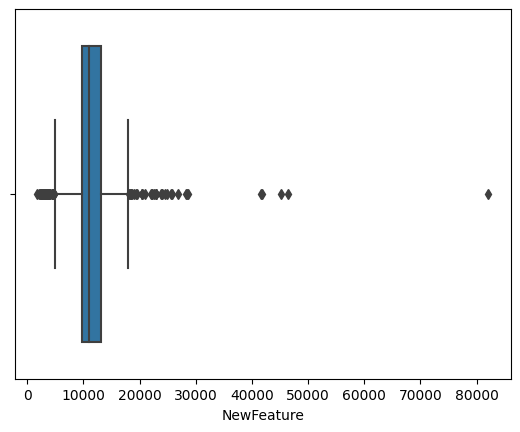

In [20]:
sns.boxplot(x=data["NewFeature"])

In [21]:
data.loc[data["Separator"]==True]["Loan_Status"].value_counts(), data.loc[data["Separator"]==False]["Loan_Status"].value_counts()

(Loan_Status
 Y    330
 N    137
 Name: count, dtype: int64,
 Loan_Status
 N    11
 Y     2
 Name: count, dtype: int64)

In [26]:
observed = [[330, 137], [2, 11]]
chi_stat, p_value, df, exp_value= chi2_contingency(observed)
chi_stat, p_value, df, exp_value

(15.62341983693342,
 7.72913548149729e-05,
 1,
 array([[323.00833333, 143.99166667],
        [  8.99166667,   4.00833333]]))

In [25]:
print('p-value:',round(p_value,4))

p-value: 0.0001
